In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weight = 0.7
bias = 0.3

In [3]:
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

In [6]:
train_split = int(0.8 * len(X))
train_split

40

In [7]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [8]:
len(X_train), len(X_test)

(40, 10)

In [9]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

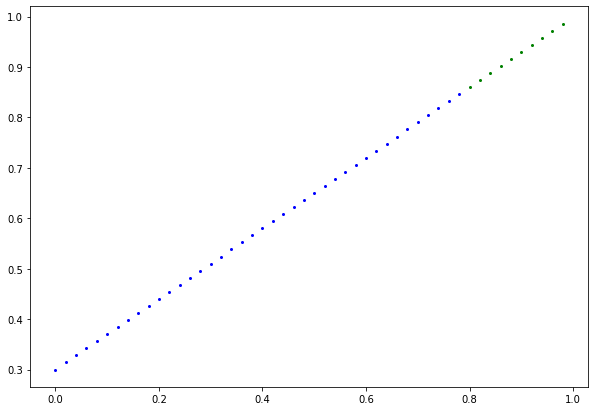

In [10]:
plot_predictions()

In [123]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

    # Forward method to difine the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return x * self.weights + self.bias

In [124]:
#torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.9346], requires_grad=True), Parameter containing:
 tensor([0.5936], requires_grad=True)]

In [125]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.9346])), ('bias', tensor([0.5936]))])

In [126]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[1.3413],
        [1.3600],
        [1.3786],
        [1.3973],
        [1.4160],
        [1.4347],
        [1.4534],
        [1.4721],
        [1.4908],
        [1.5095]])

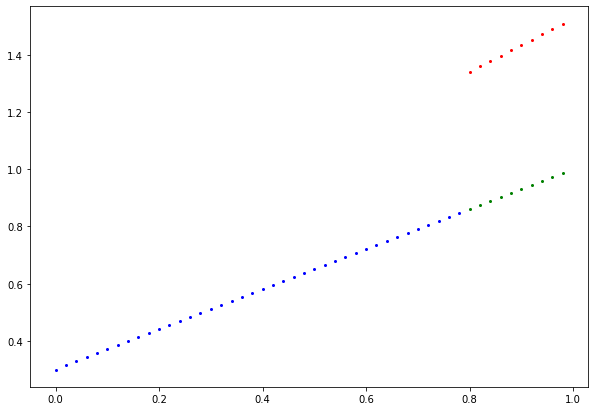

In [127]:
plot_predictions(predictions=y_preds)

In [128]:
# Set up loss function
loss_fn = nn.L1Loss()

# Set up optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [129]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.9346], requires_grad=True), Parameter containing:
 tensor([0.5936], requires_grad=True)]

In [130]:
# Building a training loop and a testing loop
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for i in range(epochs):
  # Set the model to training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimize zero grad (for freshing the gradient at each iteration of the loop otherwise gradients accumulate through the loop)
  # In minibatch training process, the gradients accumulates and then averaged across the batch, thus no clearing out in-between the itarations
  # While in per-sample training process, no average-out operation, thus no need to accumulate, then we need to clear it out at the begining of each iteration
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss w.r.t the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform the gradient descent)
  optimizer.step()

  # 6. Turn of gradient tracking
  model_0.eval()
  with torch.inference_mode():
    # 1. Do the forward pass
    test_pred = model_0(X_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    # Print out results
    if i%10 == 0:
      epoch_count.append(i)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {i} | Loss: {loss} | Test loss: {test_loss}")
      print(model_0.state_dict())
      print()

Epoch: 0 | Loss: 0.3850729167461395 | Test loss: 0.48890095949172974
OrderedDict([('weights', tensor([0.9307])), ('bias', tensor([0.5836]))])

Epoch: 10 | Loss: 0.2698630094528198 | Test loss: 0.3541910946369171
OrderedDict([('weights', tensor([0.8917])), ('bias', tensor([0.4836]))])

Epoch: 20 | Loss: 0.1546531617641449 | Test loss: 0.21948131918907166
OrderedDict([('weights', tensor([0.8527])), ('bias', tensor([0.3836]))])

Epoch: 30 | Loss: 0.04005350545048714 | Test loss: 0.0862981379032135
OrderedDict([('weights', tensor([0.8137])), ('bias', tensor([0.2851]))])

Epoch: 40 | Loss: 0.01787511073052883 | Test loss: 0.042480189353227615
OrderedDict([('weights', tensor([0.7875])), ('bias', tensor([0.2646]))])

Epoch: 50 | Loss: 0.0144107136875391 | Test loss: 0.03283388167619705
OrderedDict([('weights', tensor([0.7699])), ('bias', tensor([0.2706]))])

Epoch: 60 | Loss: 0.01097190286964178 | Test loss: 0.024561339989304543
OrderedDict([('weights', tensor([0.7528])), ('bias', tensor([0.2

In [131]:
# Plot the loss curve
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3851, grad_fn=<MeanBackward0>),
  tensor(0.2699, grad_fn=<MeanBackward0>),
  tensor(0.1547, grad_fn=<MeanBackward0>),
  tensor(0.0401, grad_fn=<MeanBackward0>),
  tensor(0.0179, grad_fn=<MeanBackward0>),
  tensor(0.0144, grad_fn=<MeanBackward0>),
  tensor(0.0110, grad_fn=<MeanBackward0>),
  tensor(0.0075, grad_fn=<MeanBackward0>),
  tensor(0.0041, grad_fn=<MeanBackward0>),
  tensor(0.0013, grad_fn=<MeanBackward0>),
  tensor(0.0013, grad_fn=<MeanBackward0>),
  tensor(0.0013, grad_fn=<MeanBackward0>),
  tensor(0.0013, grad_fn=<MeanBackward0>),
  tensor(0.0013, grad_fn=<MeanBackward0>),
  tensor(0.0013, grad_fn=<MeanBackward0>),
  tensor(0.0013, grad_fn=<MeanBackward0>),
  tensor(0.0013, grad_fn=<MeanBackward0>),
  tensor(0.0013, grad_fn=<MeanBackward0>),
  tensor(0.0013, grad_fn=<MeanBackward0>),
  tensor(0.0013, grad_fn=<MeanBackward0>)],
 [tensor(

In [132]:
loss = torch.tensor(loss_values).numpy()
loss

array([0.38507292, 0.269863  , 0.15465316, 0.04005351, 0.01787511,
       0.01441071, 0.0109719 , 0.00754312, 0.00410709, 0.00127854,
       0.00127854, 0.00127854, 0.00127854, 0.00127854, 0.00127854,
       0.00127854, 0.00127854, 0.00127854, 0.00127854, 0.00127854],
      dtype=float32)

In [133]:
test_loss = torch.tensor(test_loss_values).numpy()
test_loss

array([0.48890096, 0.3541911 , 0.21948132, 0.08629814, 0.04248019,
       0.03283388, 0.02456134, 0.0169757 , 0.00870315, 0.0136565 ,
       0.0136565 , 0.0136565 , 0.0136565 , 0.0136565 , 0.0136565 ,
       0.0136565 , 0.0136565 , 0.0136565 , 0.0136565 , 0.0136565 ],
      dtype=float32)

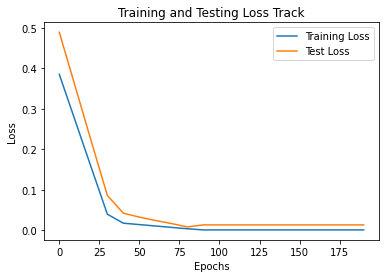

In [134]:
plt.plot(epoch_count, loss, label='Training Loss')
plt.plot(epoch_count, test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Track')
plt.legend()
plt.show()

In [148]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7029])), ('bias', tensor([0.2976]))])

In [149]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [150]:
y_preds_new

tensor([[0.8599],
        [0.8740],
        [0.8880],
        [0.9021],
        [0.9162],
        [0.9302],
        [0.9443],
        [0.9583],
        [0.9724],
        [0.9864]])

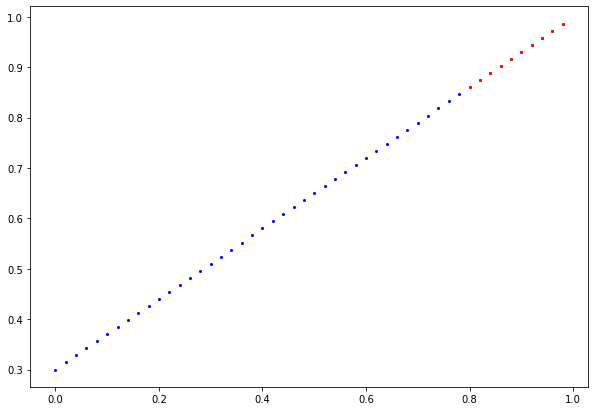

In [151]:
plot_predictions(predictions=y_preds_new)

In [152]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7029])), ('bias', tensor([0.2976]))])

In [153]:
import re

In [154]:
def bigrams(text):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  lst = text.split()
  result = []
  for i in range(len(lst)-1):
    bigram = tuple(lst[i:i+2])
    result.append(bigram)
  return result

In [155]:
bigrams('I am a coder! Can you shut up?')

[('I', 'am'),
 ('am', 'a'),
 ('a', 'coder'),
 ('coder', 'Can'),
 ('Can', 'you'),
 ('you', 'shut'),
 ('shut', 'up')]

In [156]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7029])), ('bias', tensor([0.2976]))])

In [157]:
from pathlib import Path

In [158]:
model_path = Path('model')
model_path.mkdir(parents=True, exist_ok=True)

model_name = 'pytorch_model_0.pth'
model_save_path = model_path/model_name

model_save_path

PosixPath('model/pytorch_model_0.pth')

In [159]:
torch.save(obj=model_0.state_dict(), f=model_save_path)

In [160]:
!ls -l model

total 4
-rw-r--r-- 1 root root 1095 Jan 22 18:10 pytorch_model_0.pth


In [161]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [162]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7029])), ('bias', tensor([0.2976]))])

In [166]:
loaded_model_0.eval()
with torch.inference_mode():
  preds = loaded_model_0(X_test)
print(preds)

tensor([[0.8599],
        [0.8740],
        [0.8880],
        [0.9021],
        [0.9162],
        [0.9302],
        [0.9443],
        [0.9583],
        [0.9724],
        [0.9864]])


In [167]:
y_preds_new

tensor([[0.8599],
        [0.8740],
        [0.8880],
        [0.9021],
        [0.9162],
        [0.9302],
        [0.9443],
        [0.9583],
        [0.9724],
        [0.9864]])

In [168]:
y_preds_new == preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Simply regression model in PyTorch

## Create the data

In [186]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

In [187]:
train_split = int(len(X) * 0.8)

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [188]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
  
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [189]:
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [190]:
next(model_1.parameters()).device

device(type='cpu')

In [191]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.01)

In [198]:
torch.manual_seed(42)

epochs = 100
epoch_count = []
training_losses = []
testing_losses = []

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)
  training_loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  training_loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    text_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      training_losses.append(training_loss)
      testing_losses.append(test_loss)
      print(f"Epoch: {epoch:>2d} | Training loss: {training_loss:>7f} | Test loss: {test_loss}")

Epoch:  0 | Training loss: 0.001224 | Test loss: 0.00020503401174210012
Epoch: 10 | Training loss: 0.001574 | Test loss: 0.00020503401174210012
Epoch: 20 | Training loss: 0.001989 | Test loss: 0.00020503401174210012
Epoch: 30 | Training loss: 0.001207 | Test loss: 0.00020503401174210012
Epoch: 40 | Training loss: 0.001552 | Test loss: 0.00020503401174210012
Epoch: 50 | Training loss: 0.001959 | Test loss: 0.00020503401174210012
Epoch: 60 | Training loss: 0.001192 | Test loss: 0.00020503401174210012
Epoch: 70 | Training loss: 0.001534 | Test loss: 0.00020503401174210012
Epoch: 80 | Training loss: 0.001934 | Test loss: 0.00020503401174210012
Epoch: 90 | Training loss: 0.001180 | Test loss: 0.00020503401174210012


In [199]:
training_losses

[tensor(0.0012, grad_fn=<MeanBackward0>),
 tensor(0.0016, grad_fn=<MeanBackward0>),
 tensor(0.0020, grad_fn=<MeanBackward0>),
 tensor(0.0012, grad_fn=<MeanBackward0>),
 tensor(0.0016, grad_fn=<MeanBackward0>),
 tensor(0.0020, grad_fn=<MeanBackward0>),
 tensor(0.0012, grad_fn=<MeanBackward0>),
 tensor(0.0015, grad_fn=<MeanBackward0>),
 tensor(0.0019, grad_fn=<MeanBackward0>),
 tensor(0.0012, grad_fn=<MeanBackward0>)]